# Assignment Day 3
---

## Part 2
## Data Story Telling

In [1]:
from py2neo import Graph
import pandas as pd
import jgraph as jg
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def query2table(graph, query):
    return pd.DataFrame(graph.run(query).data())

def query2tuples(graph, query):
    return [tuple(x) for x in graph.run(query)]

def measure2table(measure):
    table = pd.DataFrame.from_dict(measure, orient='index').reset_index()
    table.columns = ['nodes','score']
    return table.sort_values('score', ascending=False)

In [6]:
graph = Graph(password="1234")

In [7]:
query_1 = """
MATCH (nineties:Movie) WHERE nineties.released >= 1990 AND nineties.released < 2000 
RETURN nineties.title, nineties.released
"""

In [8]:
query2table(graph, query_1)

,nineties.released,nineties.title
0,1999,The Matrix
1,1997,The Devil's Advocate
2,1992,A Few Good Men
3,1997,As Good as It Gets
4,1998,What Dreams May Come
5,1999,Snow Falling on Cedars
6,1998,You've Got Mail
7,1993,Sleepless in Seattle
8,1990,Joe Versus the Volcano
9,1998,When Harry Met Sally


In [38]:
query = """
MATCH (n)-->(m) RETURN n.name, m.title
"""
#MATCH (n)-->(m) RETURN ID(n),ID(m)

In [39]:
query_tuples = query2tuples(graph, query)

In [40]:
g = nx.Graph()
g.add_edges_from(query_tuples)

In [41]:
centrality = measure2table(nx.degree_centrality(g))

In [42]:
centrality.head()

,nodes,score
16,A Few Good Men,0.076023
73,Tom Hanks,0.070175
38,Jerry Maguire,0.064327
124,Speed Racer,0.058480
108,Cloud Atlas,0.058480


In [43]:
closeness = measure2table(nx.closeness_centrality(g))

In [44]:
closeness.head()

,nodes,score
73,Tom Hanks,0.299475
37,Jessica Thompson,0.286432
108,Cloud Atlas,0.286432
16,A Few Good Men,0.273600
38,Jerry Maguire,0.272727


In [45]:
betweenness = measure2table(nx.betweenness_centrality(g))

In [46]:
betweenness.head()

,nodes,score
73,Tom Hanks,0.334855
108,Cloud Atlas,0.211607
16,A Few Good Men,0.211523
37,Jessica Thompson,0.165433
38,Jerry Maguire,0.148558


In [47]:
pagerank = measure2table(nx.pagerank(g, alpha=0.9))

In [48]:
pagerank.head()

,nodes,score
16,A Few Good Men,0.026381
38,Jerry Maguire,0.023829
73,Tom Hanks,0.023020
134,The Green Mile,0.019349
30,Top Gun,0.019180


In [21]:
def degree_table(degree_vector):
    d_table = pd.DataFrame()
    nodes, degrees = [], []
    for node, degree in degree_vector:
        nodes.append(node)
        degrees.append(degree)
    d_table['nodes'] = nodes
    d_table['degrees'] = degrees
    return d_table

In [22]:
degrees = degree_table(g.degree())
plot_degrees = degrees.groupby('degrees').count().head(10)

Text(0, 0.5, 'Number of nodes')

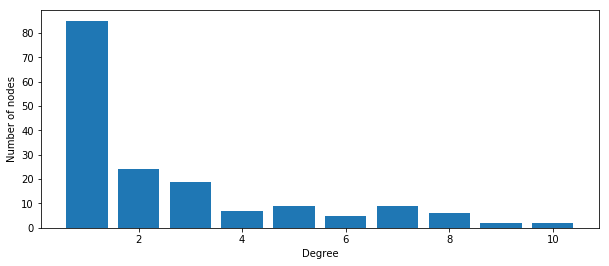

In [23]:
plt.figure(figsize=(10, 4))
plt.bar(plot_degrees.index, plot_degrees['nodes']) # degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

In [24]:
jg.draw(query_tuples, directed=False, shader="lambert",
        default_node_color=0x383294, z=200, size=(800, 600))

 Correlations of scores

In [26]:
merge1 = pd.merge(centrality, closeness, on='nodes', how='inner')
merge2 = pd.merge(merge1, betweenness, on='nodes', how='inner')
merge = pd.merge(merge2, pagerank, on='nodes', how='inner')
merge = merge.sort_values('nodes').reset_index().drop(['index','nodes'], axis=1)
merge.columns = ['centrality','closeness','betweenness','pagerank']

In [53]:
merge.head()

,centrality,closeness,betweenness,pagerank
0,0.047059,0.226064,0.036005,0.012566
1,0.041176,0.234483,0.125816,0.012714
2,0.017647,0.185387,0.000050,0.004768
3,0.017647,0.185387,0.000050,0.004768
4,0.029412,0.250737,0.029198,0.007936


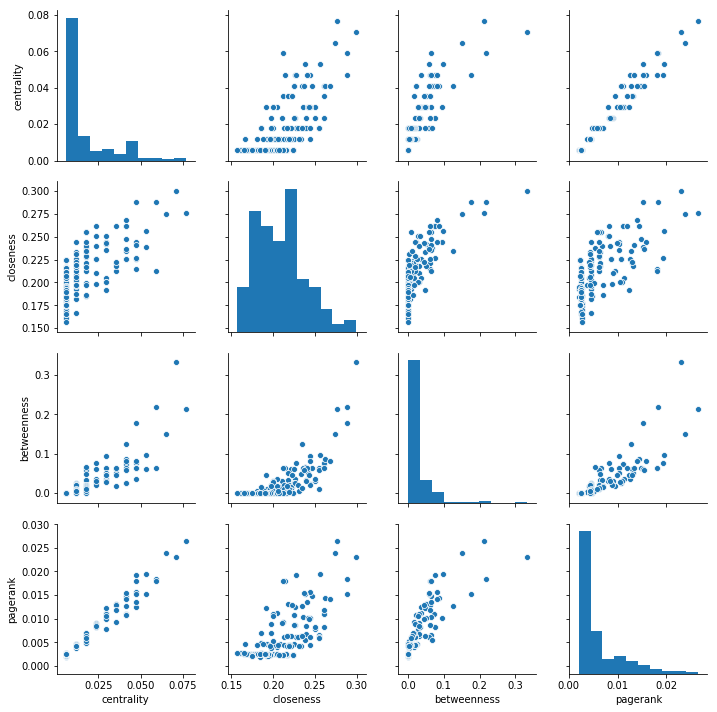

In [27]:
sns.pairplot(merge)